C:\Users\Owner\AppData\Local\Temp\ipykernel_3276\386685807.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


These results are for the multinomial model without sentence transformers
Accuracy of each fold is...
[0.69047619 0.60714286 0.63855422 0.6626506  0.56626506 0.57831325
 0.60240964 0.65060241 0.65060241 0.63855422]
average of the folds is...
0.6285570854847963

Below is the predictions of an example fold, and it's associated confusion Matrix!
Have fun looking through and seeing what the model predicted!
Tier                      "ZU"
Predictions               "RU"
Pokemon Name       "Staraptor"
Base Stat Total            485
Name: 1113, dtype: object
Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Noibat"
Base Stat Total         245
Name: 804, dtype: object
Tier                     "OU"
Predictions              "RU"
Pokemon Name       "Blaziken"
Base Stat Total           530
Name: 103, dtype: object
Tier                  "UBER"
Predictions           "UBER"
Pokemon Name       "Calyrex"
Base Stat Total          680
Name: 140, dtype: object
Tier                

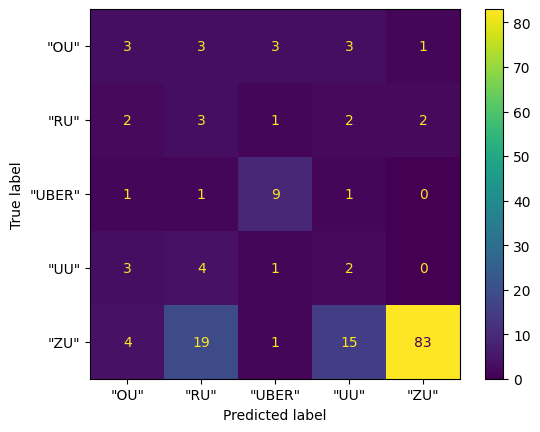

In [1]:
#Predicting Tier based off features
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#features = ["Legendary Type","Primary Type","Secondary Type","Game(s) of Origin","Health Stat","Attack Stat","Defense Stat","Special Attack Stat","Special Defense Stat","Speed Stat","Base Stat Total"]
data = data.dropna(subset="Tier")
irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

#I removed "Pokemon Name" from above so I could check what pokemon where catogorized as what
data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type as a feature for a giggle.
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
features = data.columns.values[2:]
#print(features)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])


#Setting up the Multinomial Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")
#Setting up Kfold
kFold = StratifiedKFold(n_splits=10,shuffle=True)
scores = cross_val_score(model,data[features],data["Tier"],scoring='accuracy',cv=kFold)
print("These results are for the multinomial model without sentence transformers")
print("Accuracy of each fold is...")
print(scores)
print("average of the folds is...")
print(scores.mean())
print()
print("Below is the predictions of an example fold, and it's associated confusion Matrix!")
print("Have fun looking through and seeing what the model predicted!")




model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
accuracyNumber = accuracy_score(testY,predictions)
print()
print("Accuracy =")
print(accuracyNumber)
disp.plot()
plt.show()



In [2]:
#This box of code outputs the coefficients of the trained model. It's great fun identifyinig what the model has prioritized as relevant in each tier.
#My competitive friends assure me that Ice is generally considered one of the weaker types, and fairy is univerasally considered the strongest. 
#Note that Fairy having a possitive coefficient is common in the higher tiers, and ice has a positive coefficient in the low tiers.
print("This is the coefficients associated with each tier")
numberOfCoefs = 4
for i, tier in enumerate(model.classes_):
    print(tier)
    sortedCoefs = np.argsort(model.coef_[i])
    print("Negative coefficients")
    for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
    print("Positive coefficients")
    for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
        


This is the coefficients associated with each tier
"OU"
Negative coefficients
Primary Type_"Normal"
-1.4718811122448832
Secondary Type_"Normal"
-1.319168109486674
Primary Type_"Ghost"
-1.0759585869235169
Primary Type_"Ice"
-0.9868360468063168
Positive coefficients
Primary Type_"Dragon"
0.9259225824285159
Primary Type_"Ground"
0.9477264242629395
Secondary Type_"Ground"
1.0935645401163594
Primary Type_"Fairy"
1.2419655840193125
"RU"
Negative coefficients
Primary Type_"Fairy"
-1.3150374183215874
Secondary Type_"Dragon"
-1.288108562221708
Primary Type_"Ground"
-1.1970104670542463
Secondary Type_"Ice"
-1.1384566946867625
Positive coefficients
Primary Type_"Psychic"
0.9151613349384426
Primary Type_"Fire"
0.946226621457952
Primary Type_"Normal"
1.343878904043266
Secondary Type_"Fighting"
1.3880436220353236
"UBER"
Negative coefficients
Secondary Type_"Fighting"
-1.5811693882098197
Secondary Type_"Psychic"
-1.4118001654080092
Secondary Type_"Ghost"
-1.1389262619451401
Primary Type_"Bug"
-0.9517

c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


These results are for the multinomial model WITH sentence transformers
Accuracy of each fold is...
[0.69047619 0.63095238 0.65060241 0.62650602 0.63855422 0.71084337
 0.6626506  0.63855422 0.63855422 0.6746988 ]
average of the folds is...
0.6562392426850258

Below is the predictions of an example fold, and it's associated confusion Matrix!
Have fun looking through and seeing what the model predicted!
Tier                        "UU"
Predictions                 "UU"
Pokemon Name       "Polteageist"
Base Stat Total              508
Name: 889, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Porygon"
Base Stat Total          395
Name: 896, dtype: object
Tier                     "OU"
Predictions              "OU"
Pokemon Name       "Garchomp"
Base Stat Total           600
Name: 424, dtype: object
Tier                      "ZU"
Predictions               "ZU"
Pokemon Name       "Sandshrew"
Base Stat Total            300
Name: 987, dtype: object
Tier

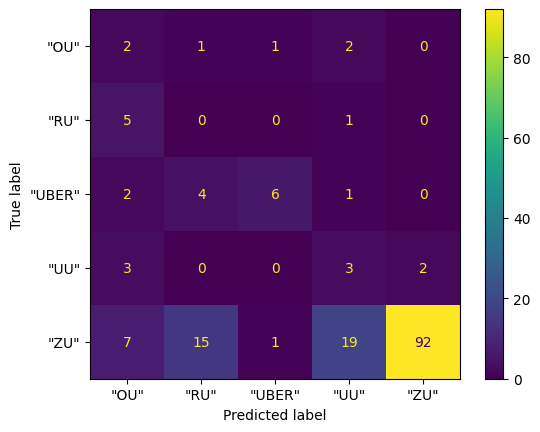

In [3]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")
#Change this to your path to the CSV
dataAgain = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
dataAgain = dataAgain.dropna(subset="Tier")

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

dataAgain = dataAgain.drop(labels=irrelevantFeatures,axis=1)
dataAgain = pd.get_dummies(dataAgain,columns=["Primary Type","Secondary Type"])
features = dataAgain.columns.values[5:]
#abilityFeatures = dataAgain.columns.values[2:5]
#print(features)
#print(abilityFeatures)

#x = np.array(data[features])
#y = np.array(data["Tier"])
#print(x)
#print(y)


dataAgain = dataAgain.fillna(value="")

allFeatures = dataAgain[features]
PrimaryEmbedings = sentencesToVectors.encode(list(dataAgain["Primary Ability Description"]))
SecondaryEmbedings = sentencesToVectors.encode(list(dataAgain["Secondary Ability Description"]))
HiddenEmbedings = sentencesToVectors.encode(list(dataAgain["Hidden Ability Description"]))

allFeatures = np.hstack([allFeatures, PrimaryEmbedings, SecondaryEmbedings, HiddenEmbedings])
allLabels = np.array(dataAgain["Tier"])

# This code can be used to do a single train_test_split.
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(dataAgain,test_size=0.2)

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])


from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")
#Setting up Kfold
kFold = StratifiedKFold(n_splits=10,shuffle=True)
#Damn the folds take forever because theres so many features lmaoooo
scores = cross_val_score(model,allFeatures,allLabels,scoring='accuracy',cv=kFold)
print("These results are for the multinomial model WITH sentence transformers")
print("Accuracy of each fold is...")
print(scores)
print("average of the folds is...")
print(scores.mean())
print()
print("Below is the predictions of an example fold, and it's associated confusion Matrix!")
print("Have fun looking through and seeing what the model predicted!")

model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
accuracyNumber = accuracy_score(testY,predictions)
print()
print("Accuracy =")
print(accuracyNumber)
disp.plot()
plt.show()

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Tier", "Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
print("Root Mean squared error =")
print(np.sqrt(mean_squared_error(testY, predictions)))
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])
print("The variance was:")
print(np.var(predictions))

Root Mean squared error =
2.242409827156492
Pokemon Name    "Kangaskhan"
Gen                        6
Predictions         5.293871
Name: 583, dtype: object
Pokemon Name    "Floette"
Gen                     6
Predictions      5.778993
Name: 385, dtype: object
Pokemon Name    "Weezing"
Gen                     1
Predictions      4.427887
Name: 1323, dtype: object
Pokemon Name    "Rhyperior"
Gen                       4
Predictions        4.824235
Name: 954, dtype: object
Pokemon Name     "Eevee"
Gen                    7
Predictions     4.357838
Name: 323, dtype: object
Pokemon Name    "Tinkaton"
Gen                      9
Predictions       7.265894
Name: 1178, dtype: object
Pokemon Name    "Drapion"
Gen                     4
Predictions      5.749635
Name: 292, dtype: object
Pokemon Name    "Scream Tail"
Gen                         9
Predictions          7.082942
Name: 1008, dtype: object
Pokemon Name    "Zamazenta"
Gen                       8
Predictions        6.734812
Name: 1362, dtype:

In [5]:
# numberOfCoefs = 3
# sortedCoefs = np.argsort(model.coef_)
# for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
#     print(features[coefficientIndex])
#     print(model.coef_[coefficientIndex])
# for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
#     print(features[coefficientIndex])
#     print(model.coef_[coefficientIndex])

In [6]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")

import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
data = data.fillna(value="") #Dont forget this or the sentence transformer will see a NaN and explode
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
#Attempting to add Sentence transformers

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])


#Without sentance transformer code
# trainX = np.array(trainData[features])
# testX = np.array(testData[features])
# trainY = np.array(trainData["Gen"])
# testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
print("Root Mean squared error =")
print(np.sqrt(mean_squared_error(testY, predictions)))
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])

print("The variance was:")
print(np.var(predictions))

Root Mean squared error =
1.8380694385917489
Pokemon Name    "Golisopod"
Gen                       7
Predictions        4.833879
Name: 467, dtype: object
Pokemon Name    "Grimer"
Gen                    1
Predictions     2.179828
Name: 492, dtype: object
Pokemon Name    "Falinks"
Gen                     8
Predictions      4.603568
Name: 355, dtype: object
Pokemon Name    "Wailmer"
Gen                     3
Predictions      4.592198
Name: 1313, dtype: object
Pokemon Name    "Croagunk"
Gen                      4
Predictions       4.216716
Name: 226, dtype: object
Pokemon Name    "Zeraora"
Gen                     7
Predictions      6.380849
Name: 1370, dtype: object
Pokemon Name    "Beedrill"
Gen                      1
Predictions       2.978647
Name: 86, dtype: object
Pokemon Name    "Mimikyu"
Gen                     7
Predictions      5.941908
Name: 747, dtype: object
Pokemon Name    "Dratini"
Gen                     1
Predictions      1.197742
Name: 293, dtype: object
Pokemon Name    "R